In [1]:
from IPython.display import Image
import math
import numpy as np

<b>OpenIntro Statistics - 8.16</b> 
On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all seven crew members on board. An investigation into the cause of the disaster focused on a critical seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may be related to the ambient temperature during the launch. The table on page 403 (and attached here - question_5_table.png) summarizes observational data on O-rings for 23 shuttle missions, where the mission order is based on the temperature at the time of the launch. Temp gives the temperature in Fahrenheit, Damaged represents the number of damaged O-rings, and Undamaged represents the number of O-rings that were not damaged.

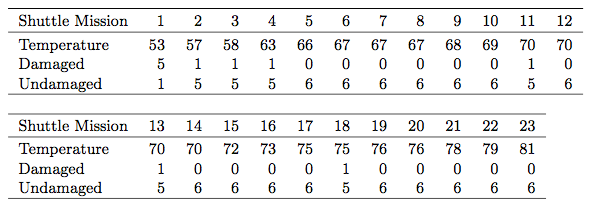

In [2]:
Image(filename='question_5_table.png') 

## (a) Each column of the table represents a different shuttle mission. Examine these data and describe what you observe with respect to the relationship between temperatures and damaged O-rings.

<b>Answer</b>
<p>Through visual inspection of the data in these tables, I would conclude that O-rings are more likely to fail (i.e. incur damage) in lower temperatures than in higher temperatures. The majority of the damaged O-rings noted, were observed when the launch temperature was 63 degrees or less. Damage was not observed in the majority of the launches that occurred in  temperatures higher than 63 degrees, which also represents the majority of the launches overall.</p>


## (b) Failures have been coded as 1 for a damaged O-ring and 0 for an undamaged O-ring, and a logistic regression model was fit to these data. A summary of this model is given below. Describe the key components of this summary table in words.
<pre>
|              | Estimate      | Std. Error  | z value  | Pr(>abs(z)) |
|--------------|---------------|-------------|----------|-------------|
| (Intercept)  | 11.663        | 3.2963      | 3.54	 | 0.0004      |
| Temperature  | -0.2162       | 0.0532      | -4.07    | 0           |
</pre>

<b>Answer</b>
<p>
    <b>Estimate (co-efficient)</b> - This tells us the average change in the response variable (failure indicator) per unit of change in the predictor (Temperature). For every 1 degree increase in temperature, you can expect the pre-transformation failure indicator to drop by -0.2162, which lowers the likelihood of failure. Since the pre-transformation failure indicator can only take on values between 0 and 1, lowering its value by 0.2162 would clearly have a signficant impact.<br/>
<br/>
<b>Std. Error (Standard Error)</b> - The standard error associated with the co-efficient<br/>
<br/>
<b>z value (z-score)</b> - represents the number of standard deviations the estimate is from the mean.<br/>
<br/>
<b>Pr(>abs(z)) (p-value)</b> - p-value is the likelihood of an estimate being further away from the mean (on either side) than the given z-score for that variable. Typically a value of 0.05 or less would indicate that the association between the variable and the response is statistically significant. Since the p-value for temperature is zero, temperature is statistically significant in this model.
</p>

## Write the code to complete the following statement:  The probability of failure at 0F is ____

In [3]:
# Just calculate the probability of failure at 0F using the model. Don't need to re-train/re-test the model (I don't think)
# Maybe write a function to calculate probability at a given temperature? Then I could re-use it for the 3 calculations below.
def probfail(t):
    numerator = np.exp(11.663 - (0.2162 * t))
    return numerator/(1 + numerator)

## Write the code to complete the follwing statement:

### The probability of failure at 0F is ____

In [4]:
print('The probability of failure at OF is{: 3.5f}'.format(probfail(0)))

The probability of failure at OF is 0.99999


## Write the code to complete the follwing statement:

### A one degree decrease at 60F results in an increase of _______ in failure probability

### A one degree decrease at 70F results in an increase of _______ in failure probability

### A one degree decrease at 80F results in an increase of _______ in failure probability

In [5]:
print('A one degree decrease at 60F results in an increase of {: 3.5f} in failure probability'.format(probfail(59) - probfail(60)))
print('A one degree decrease at 70F results in an increase of {: 3.5f} in failure probability'.format(probfail(69) - probfail(70)))
print('A one degree decrease at 80F results in an increase of {: 3.5f} in failure probability'.format(probfail(79) - probfail(80)))

A one degree decrease at 60F results in an increase of  0.03844 in failure probability
A one degree decrease at 70F results in an increase of  0.00701 in failure probability
A one degree decrease at 80F results in an increase of  0.00086 in failure probability


<b>Answer</b>
<p>
The intercept is included for the hypothetical case where temperature is 0 (probability of failure then would be 1.0). There is one variable in this model, which is Temperature. As suggested above, there is a negative relationship between Temperature and failure rate. While a one degree decrease in temperature will always increase the probability of failure, the magnitude of this change varies according to the sigmoidal function.</p>

## (c) Write out the logistic model using the point estimates of the model parameters.

$log_{e}\lgroup\frac{p_i}{1 - p_i}\rgroup = 11.663 - 0.2162 \times temperature_{i}$<br/>
<br/>
Probability of failure = $\frac{e^{11.663 - (0.2162 * temperature)}}{1 + e^{11.663 - (0.2162 * temperature)}} = \frac{1}{1 + e^{-(11.663 - (0.2162 * temperature))}}$

## (d) Based on the model, do you think concerns regarding O-rings are justified? Explain.

Based on the model, lower temperature values will result in higher probabilities of failure, which suggests the concerns regarding 0-rings are justified.

## Check how the probability changes for example from 60 to 80 degrees and answer question d.

At 80 degrees, a drop of temperature by 1 degree has a negligible impact on the probability of failure (0.0009). But at 60 degrees, a drop of just 1 degree increases the likelihood of failure by almost 4%. I believe this justifies the concern that O-ring damage is related to ambient temperature at during launch. 